Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,725,509 (14.21 MB)

 Trainable params: 3,725,509 (14.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 830s 442ms/step - accuracy: 0.9375 - loss: 0.1822 - val_accuracy: 0.9637 - val_loss: 0.1013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 462s 246ms/step - accuracy: 0.9722 - loss: 0.0809 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 688s 367ms/step - accuracy: 0.9839 - loss: 0.0455 - val_accuracy: 0.9827 - val_loss: 0.0542
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 724s 386ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9856 - val_loss: 0.0410
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 523s 279ms/step - accuracy: 0.9931 - loss: 0.0197 - val_accuracy: 0.9907 - val_loss: 0.0261
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 639s 341ms/step - accuracy: 0.9938 - loss: 0.0172 - val_accuracy: 0.9830 - val_loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 804s 429ms/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9897 - val_loss: 0.0382
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 926s 494ms/step - ac

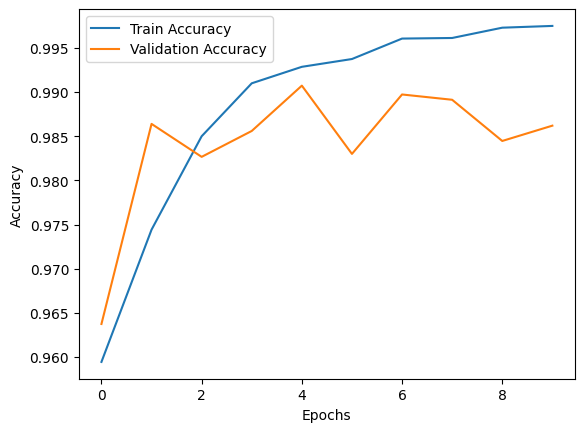

In [ ]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Dataset Path
dataset_path = r"F:\\Amrita\\6th Semester\\Neural Network And deep Learning\\Lab\\Lab-4\\archive\\Rice_Image_Dataset"

# Image Parameters
img_size = (128, 128)  # Resize all images to (128x128)
batch_size = 32

# Data Augmentation and Loading
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# CNN Model
model = Sequential([
    Conv2D(64, (3,3), input_shape=(128, 128, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Model Summary
model.summary()

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save Model
model.save("rice_cnn_model.h5")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the validation data
score = model.evaluate(val_generator, verbose=1)

# Print the model accuracy
print("\nKeras CNN accuracy on validation data:", score[1], '\n')


469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9859 - loss: 0.0553

Keras CNN accuracy on validation data: 0.9861999750137329 



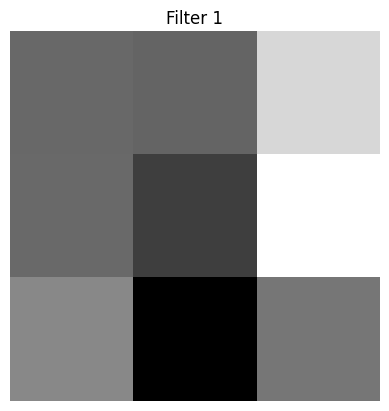

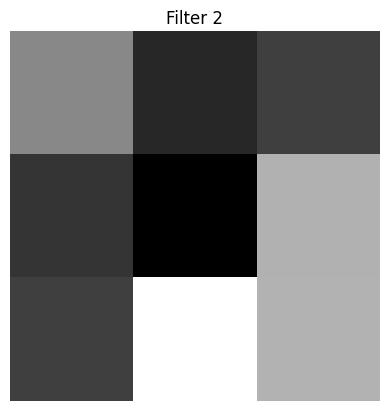

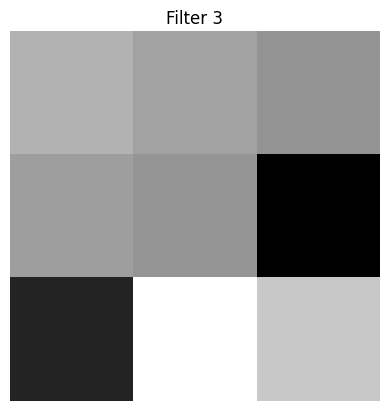

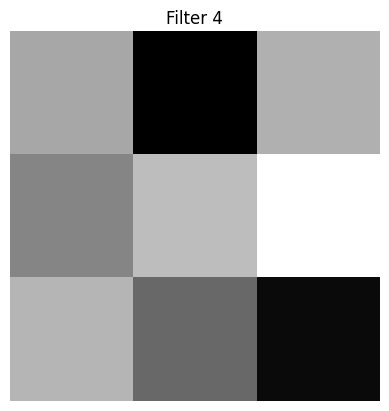

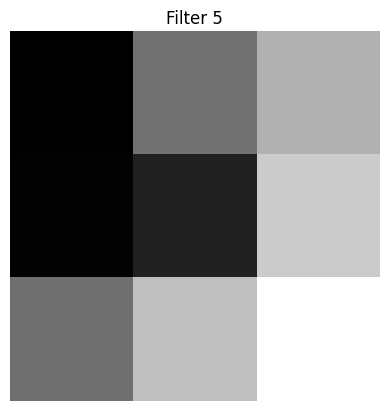

In [ ]:
# Get the weights of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to range 0-1 for better visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot the first 5 filters
num_filters_to_display = min(5, filters.shape[3])  # Ensure we don't exceed available filters

for i in range(num_filters_to_display):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f"Filter {i+1}")
    plt.axis("off")
    plt.show()


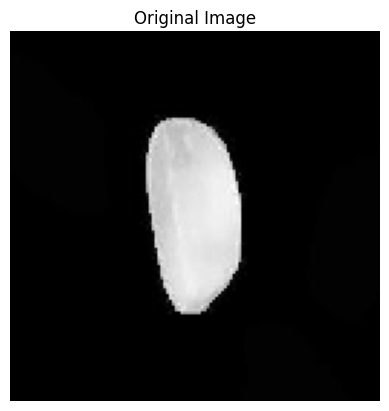

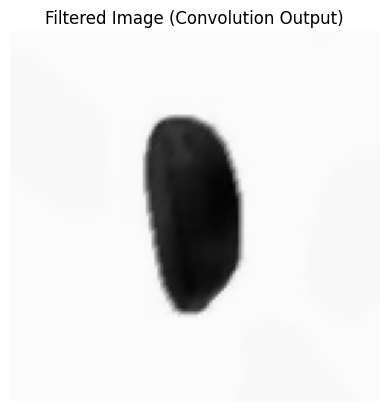

In [ ]:
from scipy import signal

# Fetch a batch of images
batch = next(train_generator)  # Use next() instead of .next()
im = batch[0][10]  # Select the 10th image from the batch

# Convert image to grayscale if necessary
im_gray = np.mean(im, axis=-1) if im.shape[-1] == 3 else im

# Display the original image
plt.imshow(im_gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# Select a filter from the first convolutional layer
filters, _ = model.layers[0].get_weights()  # Get weights of the first Conv2D layer
filt = filters[:, :, 0, 1]  # First filter applied to the first channel

# Perform 2D convolution
output = signal.convolve2d(im_gray, filt, boundary='symm', mode='same')

# Display the convolved output
plt.imshow(output, cmap='gray')
plt.title("Filtered Image (Convolution Output)")
plt.axis("off")
plt.show()


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


c:\Users\ruthe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,061 (426.02 KB)

 Trainable params: 109,061 (426.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 410s 218ms/step - accuracy: 0.9005 - loss: 0.2731 - val_accuracy: 0.9561 - val_loss: 0.1180
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9643 - loss: 0.0995 - val_accuracy: 0.9563 - val_loss: 0.1243
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9668 - loss: 0.0918 - val_accuracy: 0.9660 - val_loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9698 - loss: 0.0862 - val_accuracy: 0.9633 - val_loss: 0.1072
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9714 - loss: 0.0816 - val_accuracy: 0.9649 - val_loss: 0.0978
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9721 - loss: 0.0784 - val_accuracy: 0.9638 - val_loss: 0.1017
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9725 - loss: 0.0769 - val_accuracy: 0.9699 - val_loss: 0.0862
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9727

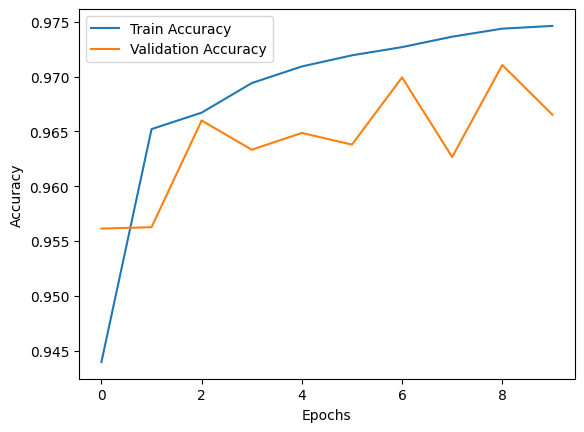

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(dataset_path, img_size=(28, 28), batch_size=32):
    """Loads and preprocesses the image dataset."""
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="grayscale",
        subset="training"
    )
    
    val_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="grayscale",
        subset="validation"
    )
    
    return train_generator, val_generator

def build_model(input_shape, num_classes):
    """Builds and compiles a fully connected neural network model."""
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def train_model(model, train_generator, val_generator, epochs=10):
    """Trains the model and returns the history object."""
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs
    )
    return history

def plot_training_history(history):
    """Plots the training and validation accuracy over epochs."""
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def main():
    dataset_path = r"F:\\Amrita\\6th Semester\\Neural Network And deep Learning\\Lab\\Lab-4\\archive\\Rice_Image_Dataset"
    img_size = (28, 28)
    batch_size = 32
    
    train_generator, val_generator = load_data(dataset_path, img_size, batch_size)
    
    model = build_model((28, 28, 1), train_generator.num_classes)
    model.summary()
    
    history = train_model(model, train_generator, val_generator, epochs=10)
    
    model.save("rice_fcnn_model.h5")
    
    plot_training_history(history)

if __name__ == "__main__":
    main()


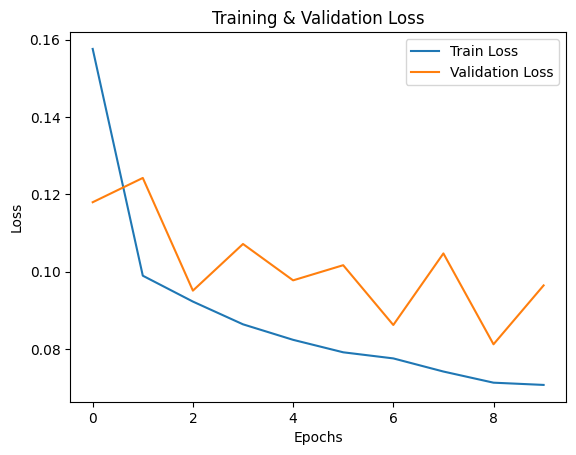

In [ ]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


Found 15000 images belonging to 5 classes.
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9675 - loss: 0.0903

🔹 Test Loss: 0.0965
🔹 Test Accuracy: 0.9665
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


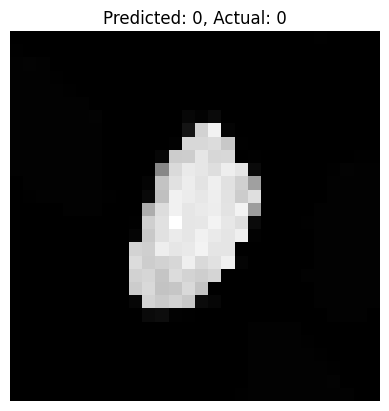

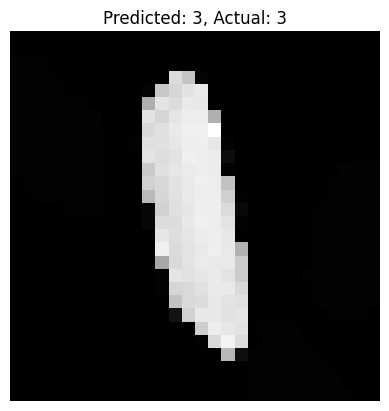

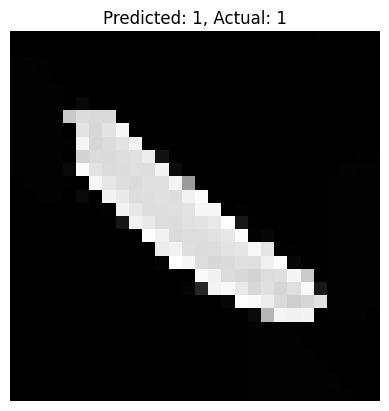

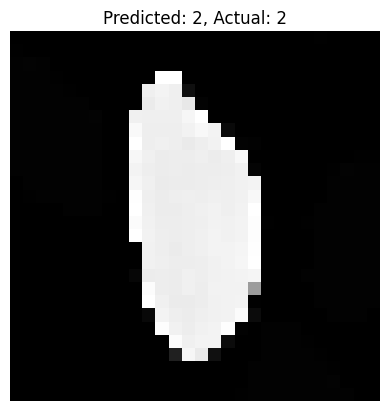

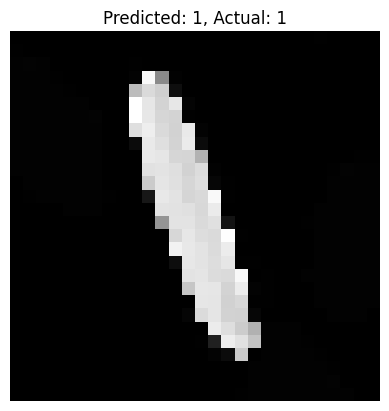

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(dataset_path, img_size=(28, 28), batch_size=32):
    """Loads and preprocesses the image dataset."""
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="grayscale",
        subset="training"
    )
    
    val_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="grayscale",
        subset="validation"
    )
    
    return train_generator, val_generator, datagen

def build_model(input_shape, num_classes):
    """Builds and compiles a fully connected neural network model."""
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def train_model(model, train_generator, val_generator, epochs=10):
    """Trains the model and returns the history object."""
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs
    )
    return history

def evaluate_model(model, dataset_path, img_size, batch_size, datagen):
    """Evaluates the model on the test set and plots predictions."""
    test_generator = datagen.flow_from_directory(
        dataset_path,  
        target_size=img_size,  
        batch_size=batch_size,  
        class_mode="categorical",  
        color_mode="grayscale",  
        subset="validation"  # If you have a separate test folder, update the path
    )
    
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)
    print(f"\n🔹 Test Loss: {test_loss:.4f}")
    print(f"🔹 Test Accuracy: {test_acc:.4f}")
    
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)
    
    for i in range(5):
        plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(test_labels[i])}")
        plt.axis("off")
        plt.show()

def main():
    dataset_path = r"F:\\Amrita\\6th Semester\\Neural Network And deep Learning\\Lab\\Lab-4\\archive\\Rice_Image_Dataset"
    img_size = (28, 28)
    batch_size = 32
    
    train_generator, val_generator, datagen = load_data(dataset_path, img_size, batch_size)
    
    model = build_model((28, 28, 1), train_generator.num_classes)
    model.summary()
    
    history = train_model(model, train_generator, val_generator, epochs=10)
    
    model.save("rice_fcnn_model.h5")
    
    plot_training_history(history)
    
    evaluate_model(model, dataset_path, img_size, batch_size, datagen)

if __name__ == "__main__":
    main()
